In [1]:
# --- Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# --- Step 1: Load Dataset with proper encoding ---
df = pd.read_csv("OnlineRetail.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# --- Step 2: Explore the Dataset ---
print("Shape of Dataset:", df.shape)
print("\nData Info:\n")
print(df.info())

Shape of Dataset: (541909, 8)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
# --- Step 3: Summary Statistics ---
print("\nStatistical Summary:\n")
print(df.describe())



Statistical Summary:

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [6]:
# --- Step 4: Null Value Detection and Removal ---
print("\nMissing Values Before Cleaning:\n", df.isna().sum())


Missing Values Before Cleaning:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# Remove unnecessary columns
required_data = df.drop(['Description', 'CustomerID', 'InvoiceNo'], axis=1)
print("\nData After Dropping Unnecessary Columns:\n")
required_data.head()


Data After Dropping Unnecessary Columns:



,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,84029E,6,12/1/2010 8:26,3.39,United Kingdom


In [9]:
# Check for nulls again
print("\nMissing Values After Cleaning:\n", required_data.isna().sum())


Missing Values After Cleaning:
 StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64


In [10]:
# --- Step 5: Group By Region and Aggregate Sales ---
sales_region = df.groupby('Country')['UnitPrice'].sum()
print("\nSales by Region:\n", sales_region)



Sales by Region:
 Country
Australia                  4054.750
Austria                    1701.520
Bahrain                      86.570
Belgium                    7540.130
Brazil                      142.600
Canada                      910.580
Channel Islands            3738.550
Cyprus                     3920.070
Czech Republic               88.150
Denmark                    1266.950
EIRE                      48447.190
European Community          294.050
Finland                    3786.850
France                    43031.990
Germany                   37666.000
Greece                      713.290
Hong Kong                 12241.500
Iceland                     481.210
Israel                     1079.040
Italy                      3879.390
Japan                       814.860
Lebanon                     242.440
Lithuania                    99.440
Malta                       666.010
Netherlands                6492.550
Norway                     6529.060
Poland                     1422.270
P

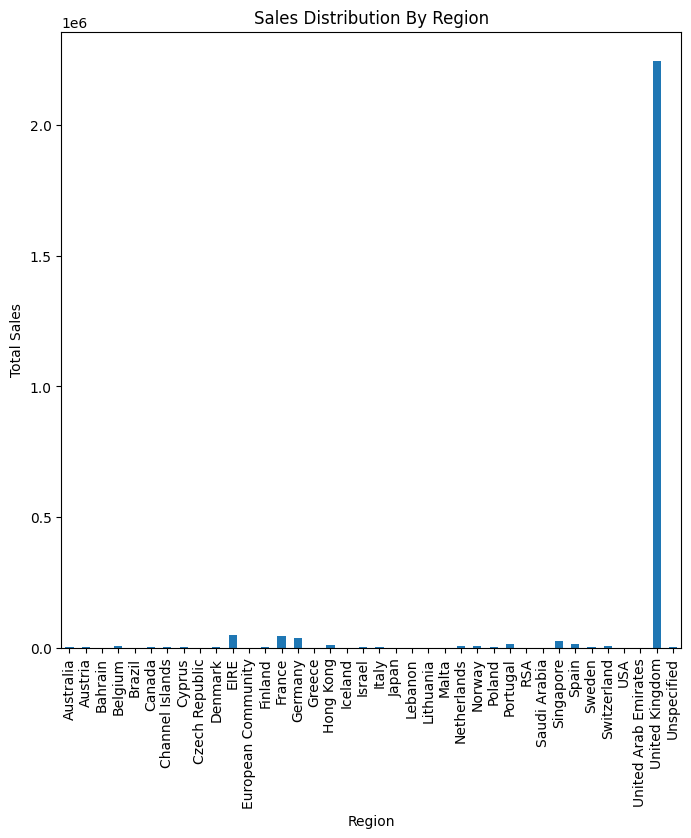

In [11]:
# --- Step 6: Visualization (Bar Plot & Pie Chart) ---
plt.figure(figsize=(8, 8))
sales_region.plot(kind='bar')
plt.title("Sales Distribution By Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

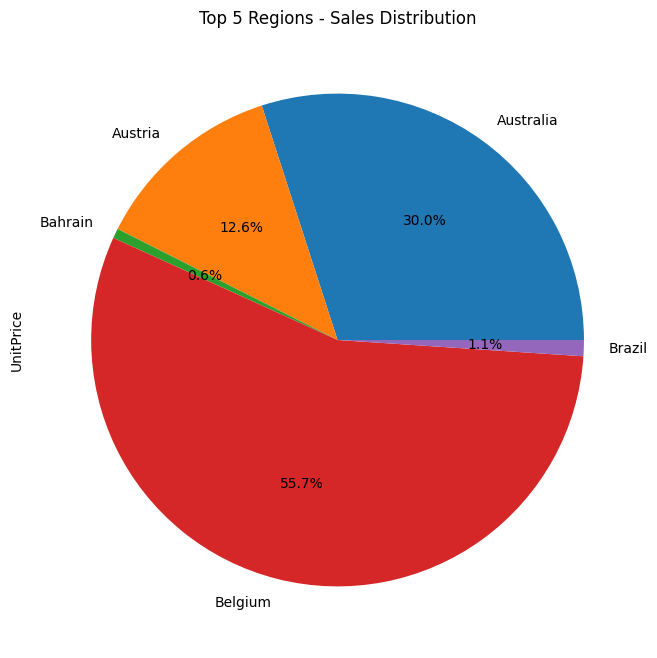

In [12]:
plt.figure(figsize=(8, 8))
region = df.groupby('Country')['UnitPrice'].sum()[:5]
region.plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 5 Regions - Sales Distribution")
plt.show()

In [13]:
# --- Step 7: Identify Top Performing Region ---
top_region = sales_region.idxmax()
print("\n Top Performing Region:", top_region)


 Top Performing Region: United Kingdom


In [14]:
# --- Step 8: Group By Country and Quantity ---
print("\nUnique Quantities Count:", len(df['Quantity'].unique()))

region_stock_code = df.groupby(['Country', 'StockCode', 'Quantity'])['UnitPrice'].sum()
print("\nGrouped Region, StockCode, Quantity Data:\n", region_stock_code.head(30))


Unique Quantities Count: 722

Grouped Region, StockCode, Quantity Data:
 Country    StockCode  Quantity
Australia  15036       600         0.72
           15056BL     3           5.95
           16161P      400         0.34
           16169E      25          0.42
           20665       6           2.95
           20675       72          1.06
                       144         1.06
           20676       72          1.06
                       144         1.06
           20677       72          1.06
                       144         1.06
           20685       4           7.95
                       6           7.95
                       20         13.50
           20711       100         1.79
           20712       10          6.11
           20713       10          1.95
           20717       10          1.25
           20725      -1           1.65
                       1           1.65
                       10          4.95
                       20          1.65
               

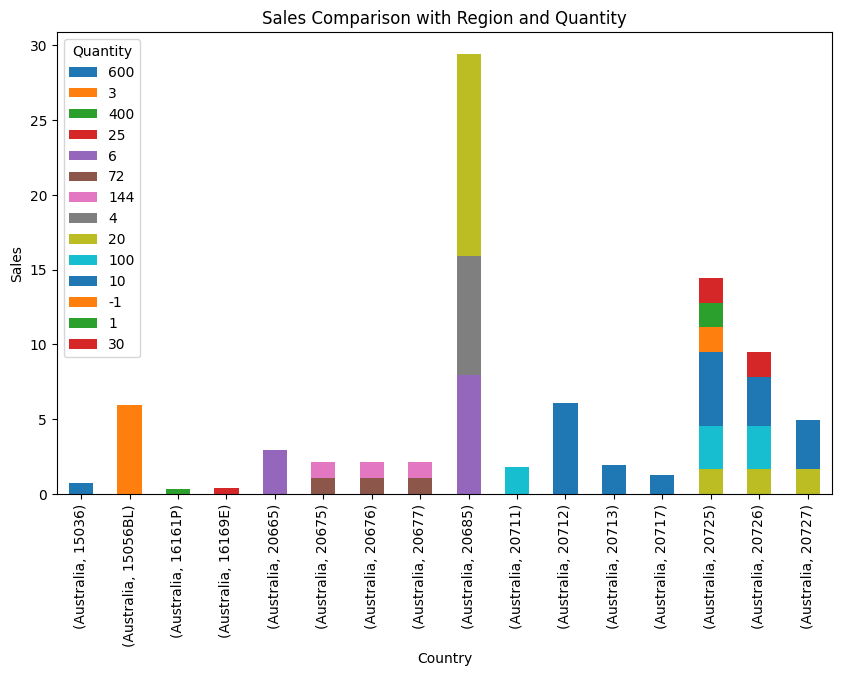

In [15]:
# --- Step 9: Stacked Bar Plot for Comparison ---
region_stock_code = df.groupby(['Country', 'StockCode', 'Quantity'])['UnitPrice'].sum()[:30]
region_stock_code.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sales Comparison with Region and Quantity")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.show()